# Image Classification - The Multi-class Weather Dataset



## Task 1 - Data exploration, preparation, and partition
Download the MWD from this site and unzip it:

- https://data.mendeley.com/datasets/4drtyfjtfy/1

You will observe that the zipped file contains 1,125 images representing various weather conditions.

### 1.1 - data partition 

Generate three CSV files named `my_training.csv`, `my_validation.csv`, and `my_test.csv` that partition the dataset into the training, validation, and test set. Each CSV file contains the following two fields:

- File path
- Image label

For example, the file `my_training.csv` could start like this:

```csv
dataset2/cloudy1.jpg,cloudy
dataset2/shine170.jpg,shine
dataset2/shine116.jpg,shine
```

Make sure that the partitions are created randomly, so that the label distribution is similar in each partition. Also, make sure that the samples are sorted in no particular order (randomly)

Display the label distribution of each partition, and display the first 10 rows of each partition.

The following sample files are available together with these instructions..

- `training.csv`
- `validation.csv`
- `test.csv`

**For the subsequent tasks in this assignment, use the files we provide (`training.csv`, `validation.csv`, `test.csv`). Do not use the files that you have generated, so that any errors generated by your solution do not carry to the rest of the assignment. Also, the files we provide conveniently removed references to images that have a number of channels different from 3.**




In [1]:
# Importing all the essential libraries
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd
import os

## 1.1 Data Partitioning for Weather Condition Images

In [2]:
# Gather all image file paths from the dataset2 folder
image_files = [('dataset2' +'/'+ file_name) for file_name in os.listdir('dataset2') if file_name.endswith('.jpg')]
image_files

['dataset2/cloudy1.jpg',
 'dataset2/cloudy10.jpg',
 'dataset2/cloudy100.jpg',
 'dataset2/cloudy101.jpg',
 'dataset2/cloudy102.jpg',
 'dataset2/cloudy103.jpg',
 'dataset2/cloudy104.jpg',
 'dataset2/cloudy105.jpg',
 'dataset2/cloudy106.jpg',
 'dataset2/cloudy107.jpg',
 'dataset2/cloudy108.jpg',
 'dataset2/cloudy109.jpg',
 'dataset2/cloudy11.jpg',
 'dataset2/cloudy110.jpg',
 'dataset2/cloudy111.jpg',
 'dataset2/cloudy112.jpg',
 'dataset2/cloudy113.jpg',
 'dataset2/cloudy114.jpg',
 'dataset2/cloudy115.jpg',
 'dataset2/cloudy116.jpg',
 'dataset2/cloudy117.jpg',
 'dataset2/cloudy118.jpg',
 'dataset2/cloudy119.jpg',
 'dataset2/cloudy12.jpg',
 'dataset2/cloudy120.jpg',
 'dataset2/cloudy121.jpg',
 'dataset2/cloudy122.jpg',
 'dataset2/cloudy123.jpg',
 'dataset2/cloudy124.jpg',
 'dataset2/cloudy125.jpg',
 'dataset2/cloudy126.jpg',
 'dataset2/cloudy127.jpg',
 'dataset2/cloudy128.jpg',
 'dataset2/cloudy129.jpg',
 'dataset2/cloudy13.jpg',
 'dataset2/cloudy130.jpg',
 'dataset2/cloudy131.jpg',
 'datas

In [3]:
# Extracting unique labels by removing numbers and file extensions from file names
unique_labels = {file_path.split('/')[-1].rstrip('0123456789.jpg') for file_path in image_files}

unique_labels = list(unique_labels)  # Convert the set to a list 

# Print the list of unique labels
print(unique_labels)

['sunrise', 'shine', 'rain', 'cloudy']


Setting a random seed for reproducibility ensures that the results of an algorithm or model can be consistently reproduced across different runs. When the random seed is set, I am essentially initializing the random number generator (RNG) with a fixed starting point, which means that the sequence of random numbers it generates will be the same each time the code is run.

In [4]:
# Shuffling the image file paths to ensure random distribution
random.seed(42)  # Seed for reproducibility of results
random.shuffle(image_files)

In [5]:
# Determining the number of images for training, validation, and testing
total_samples = len(image_files)
train_split = int(0.7 * total_samples)  # 70% of images for training
val_split = int(0.85 * total_samples)  # Additional 15% for validation


In [6]:
# Splitting the image file paths into training, validation, and test sets
train_set = image_files[:train_split]
val_set = image_files[train_split:val_split]
test_set = image_files[val_split:]


In [7]:
# Function to create a CSV file from the list of image file paths
def create_csv(file_list, file_name):
    with open(file_name, 'w') as f:
        f.write('File path,Image label\n')
        for file_path in file_list:
            # Extract the label from the file path
            label = file_path.split('/')[-1]
            label=label.split('.')[0]
            label = ''.join([i for i in label if not i.isdigit()])
            f.write(f'{file_path},{label}\n')

# Create CSV files for the training, validation, and test sets
create_csv(train_set, 'my_training.csv')
create_csv(val_set, 'my_validation.csv')
create_csv(test_set, 'my_test.csv')



In [8]:
# Function to display label distribution and the first 10 rows of each partition
def display_info(csv_file):
    df = pd.read_csv(csv_file)
    print(f"Label distribution for {csv_file}:")
    print(df['Image label'].value_counts())
    print(f"\nFirst 10 rows of {csv_file}:")
    print(df.head(10))

# Displaying information for the training, validation, and test CSV files
display_info('my_training.csv')


Label distribution for my_training.csv:
Image label
sunrise    245
cloudy     211
shine      181
rain       148
Name: count, dtype: int64

First 10 rows of my_training.csv:
                 File path Image label
0   dataset2/sunrise15.jpg     sunrise
1     dataset2/shine78.jpg       shine
2    dataset2/cloudy81.jpg      cloudy
3    dataset2/shine223.jpg       shine
4    dataset2/shine212.jpg       shine
5  dataset2/sunrise122.jpg     sunrise
6     dataset2/rain191.jpg        rain
7   dataset2/cloudy123.jpg      cloudy
8   dataset2/sunrise35.jpg     sunrise
9  dataset2/sunrise138.jpg     sunrise


In [9]:
display_info('my_validation.csv')


Label distribution for my_validation.csv:
Image label
sunrise    54
cloudy     49
shine      36
rain       29
Name: count, dtype: int64

First 10 rows of my_validation.csv:
                 File path Image label
0   dataset2/cloudy173.jpg      cloudy
1    dataset2/shine105.jpg       shine
2  dataset2/sunrise124.jpg     sunrise
3  dataset2/sunrise305.jpg     sunrise
4   dataset2/sunrise28.jpg     sunrise
5     dataset2/shine10.jpg       shine
6      dataset2/rain77.jpg        rain
7    dataset2/shine176.jpg       shine
8  dataset2/sunrise162.jpg     sunrise
9   dataset2/cloudy151.jpg      cloudy


In [10]:
display_info('my_test.csv')


Label distribution for my_test.csv:
Image label
sunrise    57
cloudy     40
rain       36
shine      36
Name: count, dtype: int64

First 10 rows of my_test.csv:
                 File path Image label
0     dataset2/rain111.jpg        rain
1  dataset2/sunrise153.jpg     sunrise
2  dataset2/sunrise176.jpg     sunrise
3  dataset2/sunrise219.jpg     sunrise
4     dataset2/rain163.jpg        rain
5  dataset2/sunrise266.jpg     sunrise
6  dataset2/sunrise308.jpg     sunrise
7   dataset2/cloudy116.jpg      cloudy
8      dataset2/rain88.jpg        rain
9     dataset2/rain127.jpg        rain


In [11]:
import pandas as pd
from IPython.display import display

# Function to create a DataFrame from a CSV file and display label distribution
def display_csv_info(csv_filename):
    # Reading the CSV file into a DataFrame
    df = pd.read_csv(csv_filename)
    # Displaying the label distribution and the first 10 rows of the DataFrame
    print(f"\nFirst 10 rows of {csv_filename}:")
    display(df.head(10))

# Displaying the information for each CSV file in a structured format
display_csv_info('my_training.csv')
display_csv_info('my_validation.csv')
display_csv_info('my_test.csv')



First 10 rows of my_training.csv:


,File path,Image label
0,dataset2/sunrise15.jpg,sunrise
1,dataset2/shine78.jpg,shine
2,dataset2/cloudy81.jpg,cloudy
3,dataset2/shine223.jpg,shine
4,dataset2/shine212.jpg,shine
5,dataset2/sunrise122.jpg,sunrise
6,dataset2/rain191.jpg,rain
7,dataset2/cloudy123.jpg,cloudy
8,dataset2/sunrise35.jpg,sunrise
9,dataset2/sunrise138.jpg,sunrise



First 10 rows of my_validation.csv:


,File path,Image label
0,dataset2/cloudy173.jpg,cloudy
1,dataset2/shine105.jpg,shine
2,dataset2/sunrise124.jpg,sunrise
3,dataset2/sunrise305.jpg,sunrise
4,dataset2/sunrise28.jpg,sunrise
5,dataset2/shine10.jpg,shine
6,dataset2/rain77.jpg,rain
7,dataset2/shine176.jpg,shine
8,dataset2/sunrise162.jpg,sunrise
9,dataset2/cloudy151.jpg,cloudy



First 10 rows of my_test.csv:


,File path,Image label
0,dataset2/rain111.jpg,rain
1,dataset2/sunrise153.jpg,sunrise
2,dataset2/sunrise176.jpg,sunrise
3,dataset2/sunrise219.jpg,sunrise
4,dataset2/rain163.jpg,rain
5,dataset2/sunrise266.jpg,sunrise
6,dataset2/sunrise308.jpg,sunrise
7,dataset2/cloudy116.jpg,cloudy
8,dataset2/rain88.jpg,rain
9,dataset2/rain127.jpg,rain


### 1.2 - preprocessing and preparation

Use TensorFlow's `TextLineDataset` to generate datasets for training, validation, and test. The datasets need to produce images that are re-sized to dimensions 230 x 230 and 3 channels, and the values of the pixels must be normalised to the range [0, 1].


## 1.2 Image Preprocessing and Dataset Preparation

In [12]:
# Set the image dimensions and number of channels
IMG_HEIGHT = 230
IMG_WIDTH = 230
IMG_CHANNELS = 3
CLASS_NAMES=unique_labels


In [13]:
import tensorflow as tf
# Preprocessing function to resize images and normalize pixel values
def preprocess_image(filename, reshape_dims):
    # Reading the image file
    img = tf.io.read_file(filename)
    # Decoding the image to a uint8 tensor and ensuring 3 color channels
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
    # Using `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resizing the image to the desired size
    img = tf.image.resize(img, reshape_dims)
    return img

# Function to parse the CSV line and return image and label
def decode_csv(csv_row):
    record_defaults = ["path", "label"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = preprocess_image(filename,  [IMG_HEIGHT, IMG_WIDTH])
    label = tf.math.equal(CLASS_NAMES, label_string)
    return img, label
# Setting the batch size for the datasets
batch_size=32
# Creating a training dataset from the CSV file
train_dataset = (tf.data.TextLineDataset(
"training.csv").
map(decode_csv)).batch(batch_size)
# Creating a validation dataset from the CSV file
eval_dataset = (tf.data.TextLineDataset(
"validation.csv").
map(decode_csv)).batch(batch_size)
# Creating a test dataset from the CSV file
test_dataset=(tf.data.TextLineDataset(
"test.csv").
map(decode_csv)).batch(batch_size)

In [14]:
# iterating over the dataset
for images, labels in train_dataset.take(1):
    print(images.shape)  # Expected output: (batch_size, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    print(labels) 



(32, 230, 230, 3)
tf.Tensor(
[[False  True False False]
 [False  True False False]
 [False False False  True]
 [ True False False False]
 [False  True False False]
 [ True False False False]
 [False False False  True]
 [ True False False False]
 [False False False  True]
 [False False False  True]
 [False  True False False]
 [ True False False False]
 [ True False False False]
 [False False  True False]
 [ True False False False]
 [ True False False False]
 [ True False False False]
 [False False False  True]
 [False False False  True]
 [False False False  True]
 [False  True False False]
 [False False False  True]
 [False  True False False]
 [False False False  True]
 [ True False False False]
 [ True False False False]
 [False False False  True]
 [ True False False False]
 [False  True False False]
 [False  True False False]
 [False  True False False]
 [False  True False False]], shape=(32, 4), dtype=bool)


In [38]:
for images, labels in train_dataset.take(1):
    print(images.shape)  # This should be (batch_size, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    # Print the minimum and maximum pixel values to check normalization
    print("Min pixel value:", np.min(images.numpy()))
    print("Max pixel value:", np.max(images.numpy()))


(32, 230, 230, 3)
Min pixel value: 0.0
Max pixel value: 1.0


## Task 2 - A simple classifier 
### 2.1 First classifier 

Create a simple model that contains the following layers:

- A `Flatten` layer.
- The output layer with the correct size and activation function for this classification task.

Then, train the model with the training data. Use the validation data to determine when to stop training. Finally, test the trained model on the test data and report the accuracy.

## 2.1 Building and Training a Simple Classifier

In [15]:
import keras
import keras_tuner as kt
from keras import models
from keras import layers
from keras.layers import Dense, Activation, Flatten

# Initializing a Sequential model
first_classifier = models.Sequential(name="Weather_classifier")

# Adding a Flatten layer of the specified input shape
first_classifier.add(layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
        
# Adding the final output layer with the specified size and activation function
first_classifier.add(layers.Dense(len(CLASS_NAMES), activation='softmax')) 

# Compiling the model with optimizer, loss function, and metrics
first_classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model using the training dataset with early stopping 
first_classifier.fit(train_dataset, validation_data=eval_dataset, epochs=5, callbacks=[keras.callbacks.EarlyStopping(patience=1)])


Epoch 1/5


C:\Users\tahan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


     25/Unknown 2s 37ms/step - accuracy: 0.3635 - loss: 76.2422

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.3669 - loss: 75.3128 - val_accuracy: 0.6587 - val_loss: 8.5857
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5995 - loss: 21.5314 - val_accuracy: 0.5329 - val_loss: 26.9615


In [16]:
# Evaluate the model on the test dataset and print the test accuracy
test_loss, test_acc = first_classifier.evaluate(test_dataset, batch_size=128)
print(f"Test accuracy: {test_acc:.3f}")

# Evaluate the model on the training dataset and print the training accuracy
train_loss, train_acc = first_classifier.evaluate(train_dataset, batch_size=128)
print(f"Training accuracy: {train_acc:.3f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5007 - loss: 33.8953
Test accuracy: 0.538
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5232 - loss: 35.1402
Training accuracy: 0.544


In [17]:
# Printing the model summary to show the architecture
first_classifier.summary()

Model: "Weather_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 158700)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       634,804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,269,610 (4.84 MB)

 Trainable params: 634,804 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 634,806 (2.42 MB)

### 2.2 A more complex classifier (2 marks)

Try a more complex architecture that has 1 or more hidden layers with dropout. For this more complex architecture, use `keras-tuner` and run it with a reasonable choice of possible parameters. You may try among the following:

- Number of hidden layers
- Sizes of hidden layers
- Dropout rate
- Learning rate

## 2.2 Building and Tuning a Deep Neural Network for a Complex Classifier

In [18]:
#Building our neural network model here
def build_weather_nn(rows, columns, channels, num_hidden, hidden_sizes, dropout_rates):
  
     weather_network = models.Sequential(name="Weather_classifier_2")
     
     # Adding a Flatten layer of the specified input shape
     weather_network.add(layers.Flatten(input_shape=(rows, columns, channels)))
     
     # Adding hidden layers of the specified sizes and activation functions
     for i in range(num_hidden):
          weather_network.add(layers.Dense(hidden_sizes[i], activation='relu'))
          # Adding dropout layer of the specified dropout rate if greater than 0
          if dropout_rates[i] > 0:
               weather_network.add(layers.Dropout(dropout_rates[i]))
               
     # Adding the final output layer with the specified size and activation function
     weather_network.add(layers.Dense(len(CLASS_NAMES), activation='softmax')) 
     
     return weather_network

In [19]:
import kerastuner as kt

def build_model(hp):
    # Parameterizing to the values in the previous cell
    lrate = hp.Float('lrate', 1e-4, 1e-1, sampling='log')
    num_hidden = hp.Int('num_hidden', 1, 3, 1)
    dropout_rate = hp.Float('dropout', 0.0, 0.8)
    hidden_size= hp.Int('hidden_size', 16, 256, 16)
    
    input_hidden=num_hidden*(hidden_size,)
    input_dropout=(num_hidden-1)*(0,)+(dropout_rate,)
    print("him:", num_hidden)
    print("input_hidden:", input_hidden)
    print("input_dropout:", input_dropout)
    
    weather_model=build_weather_nn(IMG_WIDTH,IMG_HEIGHT, IMG_CHANNELS, num_hidden, input_hidden, input_dropout)
    # Compiling the model with optimizer, loss function, and metrics
    weather_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lrate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return weather_model

batch_size=32

tuner = kt.BayesianOptimization(build_model, objective=kt.Objective('val_accuracy', 'max'), max_trials=10, num_initial_points=2, overwrite=True) # True to start afresh.
# Searching for the best hyperparameters using the training and validation data
tuner.search(train_dataset, validation_data=eval_dataset, epochs=5, callbacks=[keras.callbacks.EarlyStopping(patience=2)])

# Retrieving and printing the top 1 hyperparameters and model summary
topN = 1
for x in range(topN):
    print(tuner.get_best_hyperparameters(topN)[x].values)
    print(tuner.get_best_models(topN)[x].summary())


Trial 10 Complete [00h 00m 42s]
val_accuracy: 0.71257483959198

Best val_accuracy So Far: 0.7844311594963074
Total elapsed time: 00h 04m 51s
{'lrate': 0.0001, 'num_hidden': 3, 'dropout': 0.0, 'hidden_size': 208}
him: 3
input_hidden: (208, 208, 208)
input_dropout: (0, 0, 0.0)


C:\Users\tahan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "Weather_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 158700)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 208)            │    33,009,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 208)            │        43,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 208)            │        43,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           836 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,097,588 (126.26 MB)

 Trainable params: 33,097,588 (126.26 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(topN)[x].values

lrate=best_hyperparameters['lrate']
dropout_rate=best_hyperparameters['dropout']
num_hidden=best_hyperparameters['num_hidden']
hidden_size=best_hyperparameters['hidden_size']

input_hidden=num_hidden*(hidden_size,)
input_dropout=(num_hidden-1)*(0,)+(dropout_rate,)

print("The best hyperparameter values are:", best_hyperparameters)

The best hyperparameter values are: {'lrate': 0.0001, 'num_hidden': 3, 'dropout': 0.0, 'hidden_size': 208}


In [21]:
second_classifier= build_weather_nn(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS, num_hidden, input_hidden, input_dropout)

# Compiling the model with optimizer, loss function, and metrics
second_classifier.compile(optimizer=keras.optimizers.Adam(learning_rate=lrate), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model using the training dataset with early stopping
second_classifier.fit(train_dataset,validation_data=eval_dataset, epochs=5, callbacks=[keras.callbacks.EarlyStopping(patience=2)])





Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.3928 - loss: 2.3417 - val_accuracy: 0.7365 - val_loss: 0.5675
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.7095 - loss: 0.7377 - val_accuracy: 0.7006 - val_loss: 0.6379
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.7163 - loss: 0.6690 - val_accuracy: 0.7305 - val_loss: 0.5835


In [22]:
# Evaluate the model on the test dataset and print the test accuracy
test_loss_2, test_acc_2=second_classifier.evaluate(test_dataset, batch_size=128)
print(f"Test accuracy: {test_acc_2:.3f}")


# Evaluate the model on the training dataset and print the training accuracy
train_loss_2, train_acc_2=second_classifier.evaluate(train_dataset, batch_size=128)
print(f"Training accuracy: {train_acc_2:.3f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7389 - loss: 0.6690
Test accuracy: 0.763
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7182 - loss: 0.6636
Training accuracy: 0.743


In [23]:
print ("First_Classifier, Training Accuracy:", train_acc) 
print ("First_Classifier, Testing Accuracy:", test_acc)
print ("Second_Classifier, Training Accuracy:", train_acc_2) 
print ("Second_Classifier, Testing Accuracy:", test_acc_2)

First_Classifier, Training Accuracy: 0.5441741347312927
First_Classifier, Testing Accuracy: 0.5384615659713745
Second_Classifier, Training Accuracy: 0.7426376342773438
Second_Classifier, Testing Accuracy: 0.7633135914802551


Write text below where you explain and justify your decision choices made in this task.

For Task 2.1, I created a simple classifier with just a Flatten layer and an output layer. The decision to start with a simple model was to establish a baseline for performance. This model was quick to train and provided a fundamental understanding of how well a basic approach could perform on the dataset.

In Task 2.2, I developed a more complex classifier with one or more hidden layers and dropout. The decision to increase complexity was based on the understanding that more sophisticated models can capture deeper patterns in the data, potentially leading to better performance. I used keras-tuner to find the best combination of hyperparameters, such as the number of hidden layers, sizes of hidden layers, dropout rate, and learning rate. This approach aimed to optimize the model's architecture and training process to achieve higher accuracy.

### 2.3 Error analysis (1 mark)

Evaluate your best-performing system from task 2 against the system of task 1 and answer the following questions.

1. Which system had a better accuracy on the test data?
2. Which system had a lower degree of overfitting?

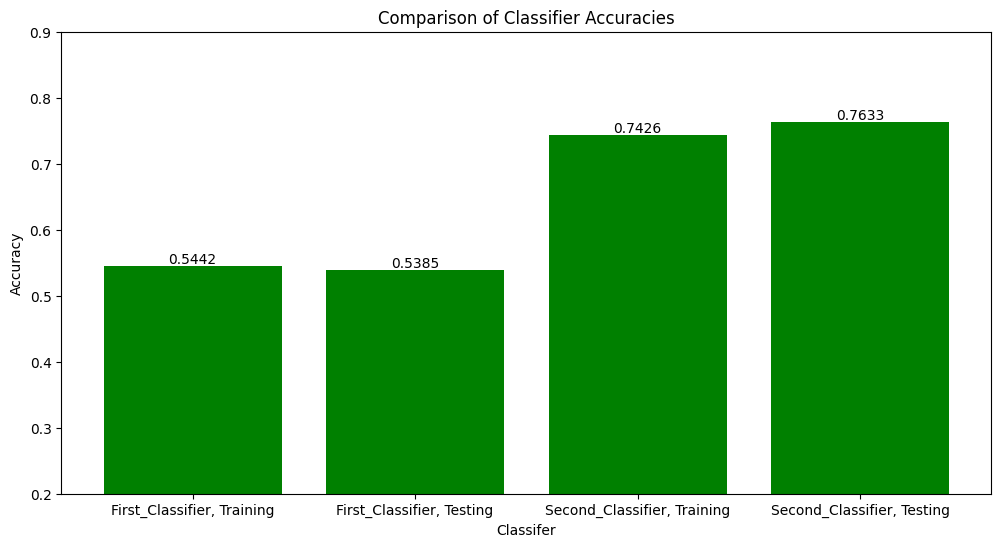

In [24]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

weather_accuracy={'First_Classifier, Training':train_acc, 'First_Classifier, Testing':test_acc, 'Second_Classifier, Training': train_acc_2, 'Second_Classifier, Testing': test_acc_2}
classifer=list(weather_accuracy.keys())
accuracies=list(weather_accuracy.values())

fig=plt.figure(figsize=(12,6))
axes=plt.axes()
axes.set_ylim([0.2, 0.9])
plt.bar(classifer, accuracies, color='green')

# Display the accuracies above the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc:.4f}", ha='center', va='bottom')

plt.title("Comparison of Classifier Accuracies")
plt.xlabel("Classifer")
plt.ylabel("Accuracy")
plt.show()

### 1. Which system had a better accuracy on the test data?

Ans: The second classifier had better accuracy on the test data with an accuracy of 0.7633 compared to the first classifier's accuracy of 0.5385. This suggests that the complexity added by the hidden layers and dropout was beneficial for the model's performance on this task.

### 2. Which system had a lower degree of overfitting?

Ans: To determine the degree of overfitting, we compare the accuracy on the training data with the accuracy on the test data. A smaller gap between training and test accuracy typically indicates less overfitting. The first classifier has a very small difference between training and test accuracy (0.5442 vs. 0.5385), suggesting it did not overfit much but there is overfitting. The second classifier has a higher difference between training and test accuracy (0.7426 vs. 0.7633), which suggests no overfitting i.e., the model is generalising well on the test data.

So, to conclude Second Classifer has a lower degree of overfitting.

## Task 3 - A more complex classifier 

### Task 3.1 Using ConvNets 

Implement a model that uses a sequence of at least two `ConvD`, each one followed with `MaxPooling2D`. Use reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation, etc), base on what we have seen in the lectures. Feel free to research the internet and / or generative AI to help you find a reasonable choice of hyperparameters. For this task, do not use pre-trained models.

In [25]:
import tensorflow_hub as hub
from tensorflow.keras import models
from tensorflow. keras import layers
#from tensorflow. keras. layers import Convolution2D(tensorflow1.X)
from tensorflow.keras. layers import Conv2D


In [26]:
#%%
def create_weather_classifier(num_conv_layers, conv_filters, conv_kernel_sizes, pool_sizes):
    weather_model = models.Sequential(name="Weather_Classifier")
    for layer_index in range(num_conv_layers):
        if layer_index == 0:
            # For the first layer, include the input_shape
            weather_model.add(layers.Conv2D(filters=conv_filters[layer_index], 
                                            kernel_size=conv_kernel_sizes[layer_index], 
                                            activation="relu", 
                                            input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
        else:
            # Subsequent layers will not require the input_shape
            weather_model.add(layers.Conv2D(filters=conv_filters[layer_index], 
                                            kernel_size=conv_kernel_sizes[layer_index], 
                                            activation="relu"))
        
        # Add MaxPooling layer if pool size is greater than 0
        if pool_sizes[layer_index] > 0:
            weather_model.add(layers.MaxPooling2D(pool_size=pool_sizes[layer_index]))
    
    # Flatten the output of the last convolutional layer
    weather_model.add(layers.Flatten())
    
    # Output layer with a number of neurons corresponding to the number of classes
    weather_model.add(layers.Dense(len(CLASS_NAMES), activation='softmax'))
    
    return weather_model

#%%

def build_hyperparameter_tuned_model(hp):
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-1, sampling='log')
    num_conv_layers = hp.Choice('num_conv_layers', [2, 3])
    
    conv_filters = []
    conv_kernel_sizes = []
    for layer_index in range(num_conv_layers):
        filter_count = hp.Int(f'conv_{layer_index}_filters', 16, 256, 32)
        conv_filters.append(filter_count)
    
    for layer_index in range(num_conv_layers):
        kernel_size = hp.Choice(f'conv_{layer_index}_kernel_size', values=[3, 5])
        conv_kernel_sizes.append(kernel_size)
        
    print("Convolutional Filters:", conv_filters)
    print("Kernel Sizes:", conv_kernel_sizes)
    print("Number of Convolutional Layers:", num_conv_layers)
    print("Pooling Sizes:", num_conv_layers * [2])

    # Build the model using the determined hyperparameters
    tuned_weather_model = create_weather_classifier(num_conv_layers, conv_filters, conv_kernel_sizes, num_conv_layers * [2])
    tuned_weather_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
                                loss='categorical_crossentropy', 
                                metrics=['accuracy'])
    
    return tuned_weather_model




## 3.1 Designing and Training a Convolutional Neural Network from Scratch for Image Classification

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS) 

num_classes = len(CLASS_NAMES)  

weather_model_3 = Sequential(name='Weather_CNN')

# Adding the first Conv2D layer with 32 filters, a kernel size of 3x3, and ReLU activation
weather_model_3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))

# Adding the first MaxPooling2D layer with a pool size of 2x2
weather_model_3.add(MaxPooling2D(pool_size=2))

# Adding the second Conv2D layer with 64 filters, a kernel size of 3x3, and ReLU activation
weather_model_3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Adding the second MaxPooling2D layer with a pool size of 2x2
weather_model_3.add(MaxPooling2D(pool_size=2))

# Adding the third Conv2D layer with 128 filters, a kernel size of 3x3, and ReLU activation
weather_model_3.add(Conv2D(filters=128, kernel_size=3, activation='relu'))

# Flattening the output of the last pooling layer
weather_model_3.add(Flatten())

# Adding a Dense (fully connected) layer with a number of neurons equal to the number of classes and softmax activation
weather_model_3.add(Dense(num_classes, activation='softmax'))

# Compiling the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
weather_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

weather_model_3.summary()

C:\Users\tahan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "Weather_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 228, 228, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 114, 114, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 54, 54, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │     1,492,996 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,586,244 (6.05 MB)

 Trainable params: 1,586,244 (6.05 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#Training the model using the training dataset with early stopping
weather_model_3.fit(train_dataset, validation_data=eval_dataset, epochs=10, callbacks=[keras.callbacks.EarlyStopping(patience=2)])


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 743ms/step - accuracy: 0.4538 - loss: 3.6145 - val_accuracy: 0.8623 - val_loss: 0.4525
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 711ms/step - accuracy: 0.8236 - loss: 0.5381 - val_accuracy: 0.8982 - val_loss: 0.3968
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 736ms/step - accuracy: 0.8710 - loss: 0.3589 - val_accuracy: 0.8623 - val_loss: 0.3604
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 694ms/step - accuracy: 0.8694 - loss: 0.4028 - val_accuracy: 0.6707 - val_loss: 0.7827
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 684ms/step - accuracy: 0.8281 - loss: 0.4582 - val_accuracy: 0.8982 - val_loss: 0.3684


In [29]:
# Evaluate the model on the test dataset and print the test accuracy
test_loss_3, test_acc_3=weather_model_3.evaluate(test_dataset, batch_size=128)
print(f"Test accuracy: {test_acc_3:.3f}")


# Evaluate the model on the training dataset and print the training accuracy
train_loss_3, train_acc_3=weather_model_3.evaluate(train_dataset, batch_size=128)
print(f"Training accuracy: {test_acc_3:.3f}")




6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8544 - loss: 0.3691
Test accuracy: 0.876
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.8843 - loss: 0.3079
Training accuracy: 0.876


### Task 3.2 Using pre-trained models 

Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. Make sure that you freeze MobileNet's weights during training. Also, make sure you use a reasonable schedule for the learning rate.

## 3.2 Fine-Tuning a Pre-trained MobileNet Model

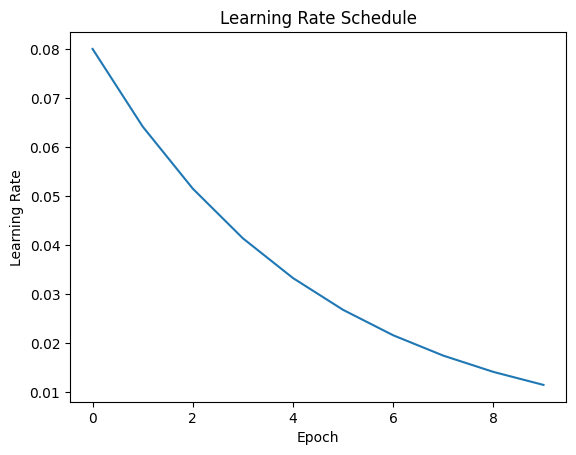

Learning rate schedule: 0.08 to 0.08 to 0.0114


In [30]:
from matplotlib import pyplot as plt

EPOCHS = 10

# Define the learning rate schedule
LR_START = 0.00001
LR_MAX = 0.08
LR_MIN = 0.0008
LR_RAMPUP_EPOCHS = 0
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .8
# Function to calculate the learning rate for each epoch
def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr
# Callback for updating the learning rate
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)
# Plot the learning rate schedule
rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))


In [31]:
LEARNING_RATE = 0.001

# Fetching the pre-trained MobileNet model
mobilenet_model = tf.keras.applications.MobileNet(weights="imagenet", input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), include_top=False, pooling="avg")

# Freezing the layers of the MobileNet model
for layer in mobilenet_model.layers:
    layer.trainable = False

# Initializing the model and add the pre-trained MobileNet    
model_4 = tf.keras.Sequential()
model_4.add(mobilenet_model)

# Adding a Dense layer as the output classification layer
model_4.add(tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax', name='flower_prob'))

# Compiling the model with the Adam optimizer and categorical crossentropy loss
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss = 'categorical_crossentropy',
    metrics=['categorical_accuracy']
)

model_4.summary()

# Training the model with the training dataset and early stopping
history = model_4.fit(train_dataset, validation_data=eval_dataset, epochs=EPOCHS, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)])



C:\Users\tahan\AppData\Local\Temp\ipykernel_14968\1670676997.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = tf.keras.applications.MobileNet(weights="imagenet", input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), include_top=False, pooling="avg")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flower_prob (Dense)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 543ms/step - categorical_accuracy: 0.4026 - loss: 1.3371 - val_categorical_accuracy: 0.7904 - val_loss: 0.5316
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/step - categorical_accuracy: 0.8540 - loss: 0.4907 - val_categorical_accuracy: 0.8563 - val_loss: 0.3131
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 496ms/step - categorical_accuracy: 0.9252 - loss: 0.3044 - val_categorical_accuracy: 0.9042 - val_loss: 0.2455
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 509ms/step - categorical_accuracy: 0.9386 - loss: 0.2324 - val_categorical_accuracy: 0.9222 - val_loss: 0.2086
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/step - categorical_accuracy: 0.9508 - loss: 0.1923 - val_categorical_accuracy: 0.9281 - val_loss: 0.1843
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 475ms/step - categorical_accuracy: 0.9579 - loss: 0.1642 - val_categorical_accuracy: 0.9341 - val_loss: 0.1669
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - categorical_accuracy: 0.964

In [32]:
# Evaluate the model on the test dataset and print the test accuracy
test_loss_4, test_acc_4 = model_4.evaluate(test_dataset, batch_size=128)
print(f"Test accuracy: {test_acc_4:.3f}")

# Evaluate the model on the test dataset and print the test accuracy
train_loss_4, train_acc_4 = model_4.evaluate(train_dataset, batch_size=128)
print(f"Training accuracy: {test_acc_4:.3f}")




6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - categorical_accuracy: 0.9645 - loss: 0.1204
Test accuracy: 0.953
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 420ms/step - categorical_accuracy: 0.9788 - loss: 0.0947
Training accuracy: 0.953


### Task 3.3 Comparative evaluation (1 mark)

Compare the evaluation results of the best systems from tasks 3.1 and 3.2 and answer the following questions.

1. What system (including the systems you developed in Task 2) perform best on the test set?
2. Report the accuracy of your best system on each of the different weather categories. What type of weather was most difficult to detect?

To answer question 1 and determine which system performs best on the test set, we will visualize the four accuracies by plotting them on a bar graph. A bar graph is an effective way to compare numerical values across different categories—in this case, the performance of the four classifiers. By representing each classifier's test accuracy as a bar, we can easily see which classifier has the highest accuracy and how they rank relative to each other.


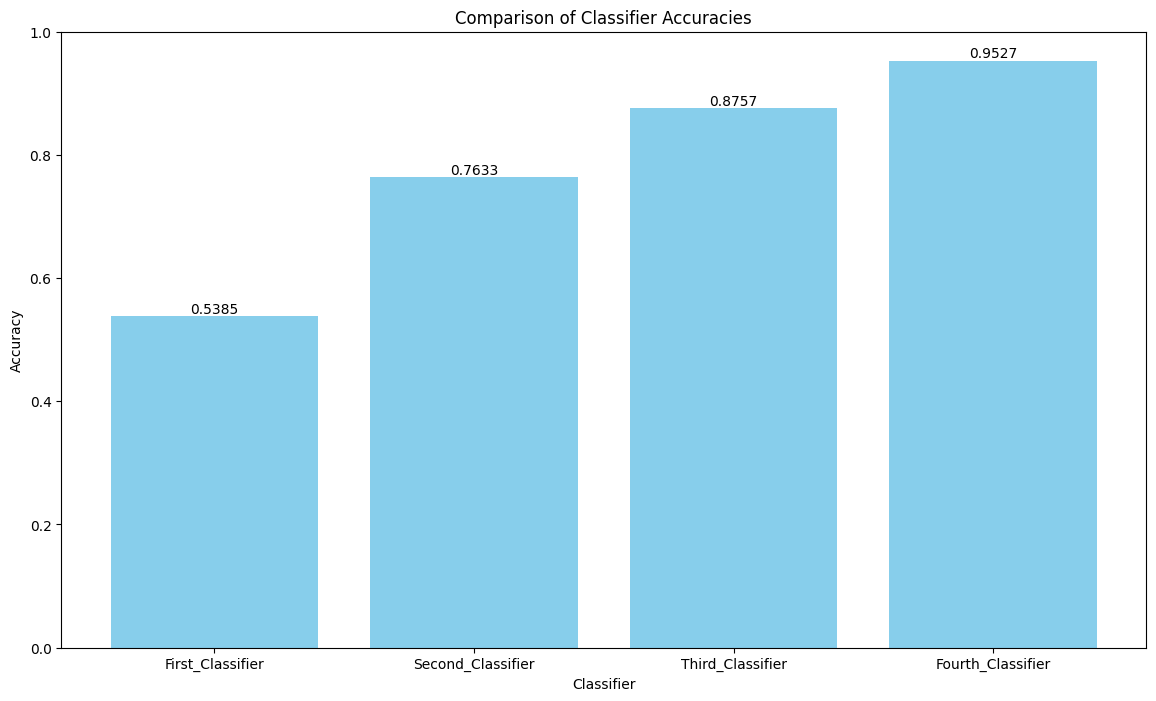

In [33]:
import matplotlib.pyplot as plt

# Dictionary to hold classifier names and their corresponding test accuracies
classifier_accuracies = {
    'First_Classifier': test_acc,  
    'Second_Classifier': test_acc_2,  
    'Third_Classifier': test_acc_3,  
    'Fourth_Classifier': test_acc_4  
}

# Extract classifier names and their accuracies for plotting
classifier_names = list(classifier_accuracies.keys())
accuracy_values = list(classifier_accuracies.values())

# Creating a figure and axis for the bar graph
fig, ax = plt.subplots(figsize=(14, 8))

# Setting the limits for the y-axis
ax.set_ylim([0, 1.0])

# Creating the bar graph
ax.bar(classifier_names, accuracy_values, color='skyblue')

# Displaying the accuracies above the bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc, f"{acc:.4f}", ha='center', va='bottom')

# Setting the title and labels for the graph
plt.title("Comparison of Classifier Accuracies")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

# Displaying the bar graph
plt.show()


### 1. What system (including the systems you developed in Task 2) perform best on the test set?


The bar graph provided shows the test set accuracies of four different classifiers. The first classifier has the lowest accuracy, which is likely because it is a simple model with just a `Flatten` layer and an output layer. This basic structure may not be capable of capturing the complex patterns in the data, leading to lower performance.

The second classifier shows moderate accuracy, which is an improvement over the first. This classifier is more complex, with one or more hidden layers and dropout, which helps prevent overfitting. The use of `keras-tuner` to optimize the hyperparameters like the number of hidden layers, sizes of hidden layers, dropout rate, and learning rate contributes to its better performance compared to the first classifier.

The third classifier performs better than the second, and this improvement can be attributed to its convolutional neural network (CNN) architecture. This model uses a sequence of convolutional layers (`Conv2D`) followed by max pooling layers (`MaxPooling2D`), which are particularly effective for image recognition tasks. The convolutional layers help the model learn hierarchical feature representations of the images, while the pooling layers reduce the spatial size of the representations, making the model more efficient and less prone to overfitting.

Finally, the fourth classifier, which uses a pre-trained model, outperforms all the previous classifiers. Pre-trained models come with weights that have already been optimized on a large dataset, allowing them to transfer learned features to the new task. This transfer learning approach, combined with fine-tuning on the specific dataset, often leads to higher accuracy, as the model can leverage its pre-existing knowledge of image features.

In summary, the graph illustrates the progression from a simple to a more sophisticated model architecture, with each step up in complexity resulting in improved accuracy on the test set. The use of a pre-trained model for the fourth classifier demonstrates the significant advantage that transfer learning can provide in machine learning tasks.


In [34]:
print(CLASS_NAMES)

['sunrise', 'shine', 'rain', 'cloudy']


### 2. Report the accuracy of your best system on each of the different weather categories. What type of weather was most difficult to detect?

In [35]:
from collections import Counter
import numpy as np
import tensorflow as tf

# Function to calculate the accuracy for each class
def calculate_class_accuracy(model, dataset):
    # Predicting the classes for the dataset and getting the class index with the highest probability
    predicted_classes = np.argmax(model.predict(dataset), axis=1)
    
    # Initializing an array to hold the true labels and a counter for each class
    true_labels = []
    class_counts = Counter()
    
    # Iterating over the dataset to extract the true labels and count them
    for _, labels in dataset:
        labels = np.argmax(labels.numpy(), axis=1)  # Converting one-hot encoded labels to class indices
        true_labels.extend(labels)
        class_counts.update(labels)
    
    # Counting the number of correct predictions for each class
    correct_predictions = Counter()
    for i, predicted_class in enumerate(predicted_classes):
        if predicted_class == true_labels[i]:
            correct_predictions.update([predicted_class])
    
    # Calculating the accuracy for each class
    class_accuracies = {}
    for class_index, count in class_counts.items():
        accuracy = correct_predictions[class_index] / count
        class_accuracies[class_index] = accuracy
    
    # Returning the accuracies as a list
    return [class_accuracies[i] for i in range(len(class_accuracies))]



In [36]:
accuracies_first_classifier = calculate_class_accuracy(first_classifier, test_dataset)
print("Accuracies for first_classifier:", accuracies_first_classifier)

accuracies_second_classifier = calculate_class_accuracy(second_classifier, test_dataset)
print("Accuracies for second_classifier:", accuracies_second_classifier)

accuracies_weather_model_3 = calculate_class_accuracy(weather_model_3, test_dataset)
print("Accuracies for weather_model_3:", accuracies_weather_model_3 )

accuracies_model_4 = calculate_class_accuracy(model_4, test_dataset)
print("Accuracies for accuracies_model_4:", accuracies_model_4)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracies for first_classifier: [0.9183673469387755, 0.0, 0.9705882352941176, 0.2549019607843137]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracies for second_classifier: [0.8775510204081632, 0.8, 0.9705882352941176, 0.49019607843137253]
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
Accuracies for weather_model_3: [0.9795918367346939, 0.6285714285714286, 1.0, 0.8627450980392157]
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step
Accuracies for accuracies_model_4: [0.9795918367346939, 0.8571428571428571, 1.0, 0.9607843137254902]


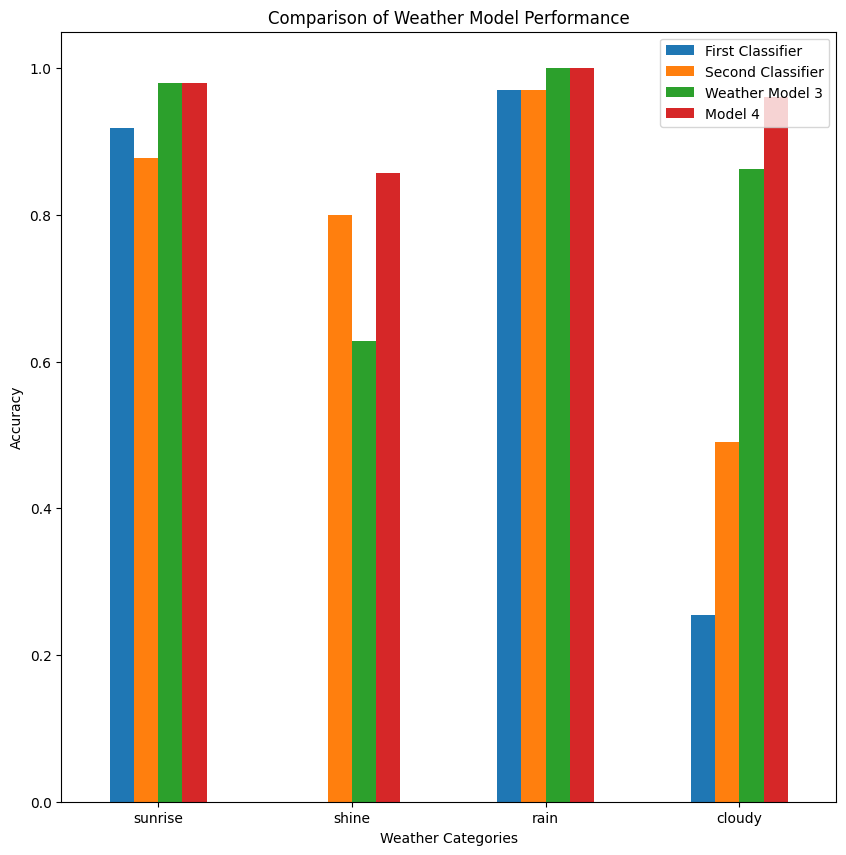

In [37]:
df = pd.DataFrame({
    'First Classifier': accuracies_first_classifier,
    'Second Classifier': accuracies_second_classifier,
    'Weather Model 3': accuracies_weather_model_3,
    'Model 4': accuracies_model_4
})
df = df.rename(index=dict(zip(range(len(CLASS_NAMES)), CLASS_NAMES)))
ax = df.plot(kind='bar', figsize=(10, 10), rot=0, title="Comparison of Weather Model Performance", xlabel="Weather Categories", ylabel="Accuracy")
plt.show()

Based on the bar graph provided, we can analyze the performance of each classifier across the different weather categories and determine which type of weather was most difficult to detect.

From the bar graph, we can observe the following accuracies for each classifier and weather category:

- **Sunrise**:
  - First Classifier: ~0.91
  - Second Classifier: ~0.87
  - Weather Model 3: ~0.97
  - Model 4: ~0.97

- **Shine**:
  - First Classifier: 0
  - Second Classifier: 0.80
  - Weather Model 3: ~0.62
  - Model 4: ~0.85

- **Rain**:
  - First Classifier: ~0.97
  - Second Classifier: ~0.97
  - Weather Model 3: 1.0
  - Model 4: 1.0

- **Cloudy**:
  - First Classifier: ~0.25
  - Second Classifier: ~0.49
  - Weather Model 3: ~0.86
  - Model 4: ~0.96

From these observations, we can answer the questions as follows:

1. **Best System on the Test Set**:  Model 4 (Pre-trained model) consistently shows high accuracy across all weather categories, achieving perfect or near-perfect scores in the sunrise and rain categories and the highest score in the shine category compared to other models. Therefore, Model 4 is the best-performing system on the test set.

2. **Accuracy of the Best System on Each Weather Category**:
   - For **sunrise**, Model 4 has an accuracy of approximately 97%.
   - For **shine**,  Model 4 has an accuracy of approximately 85%.
   - For **rain**,  Model 4 again has an accuracy of approximately 100%.
   - For **cloudy**, Model 4 has the highest accuracy among the classifiers at approximately 96%.

**Most Difficult Weather to Detect**: Based on the accuracies, the most difficult type of weather to detect is **shine**. All classifiers perform the worst in this category with first classifier unable to detect it. However, Model 4 achieved the highest accuracy of approximately 85%, which is significantly lower than its performance on other weather types.

Another interesting observation is that first_classifier performs fairly well on Sunrise and Rain categories against second_classifier. In the case of Sunrise it surpasses the second_classifier's accuracy and in the case of Rain it equals the accuracy, which is quite surprsing. 

In conclusion, Model 4 outperforms the other classifiers in all weather categories, with shine weather being the most challenging to classify accurately. Despite the difficulty, Model 4 still manages to achieve the highest accuracy for shine conditions compared to the other models.
